# Investment Assignment

Data Analysis to find the best suitable Investment Horizon for **Spark Funds**

## 1. Investment Type Analysis

Finding the Best Investment Type for Spark Funds

In [1]:
import pandas

Loading the **rounds2.csv** file using pandas. 
The length of the column **company_permalink** must be the number of unique companies in it.

In [2]:
rounds2 = pandas.read_csv('rounds2.csv', sep=',', encoding='unicode_escape')
rounds2_permalinks = rounds2['company_permalink'].str.lower()
rounds2_unique_permalinks = set(rounds2_permalinks)
print(f'Length of rounds2 Unique permalink : {len(rounds2_unique_permalinks)}')

Length of rounds2 Unique permalink : 66370


Repeating the same steps above for **companies.csv**

In [3]:
companies = pandas.read_csv('companies.csv', sep='\t', encoding='unicode_escape')
companies_permalinks = companies['permalink'].str.lower()
companies_unique_permalinks = set(companies_permalinks)
print(f'Length of comapnies Unique permalinks : {len(companies_unique_permalinks)}')

Length of comapnies Unique permalinks : 66368


In [4]:
difference = rounds2_unique_permalinks.difference(companies_unique_permalinks)   # set difference
print(f'Number of companies that are NOT in companies.csv but in rounds2.csv = {len(difference)}')

Number of companies that are NOT in companies.csv but in rounds2.csv = 57


Converting every value to lower case of column **company_permalink** of rounds2 and renaming as **permalink**

In [5]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2 = rounds2.rename({'company_permalink': 'permalink'}, axis=1)
rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Converting every value to lower case of column **permalink** of companies.

In [6]:
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Merging the two dataframes together as **master**

In [7]:
companies.set_index(['permalink'])
rounds2.set_index(['permalink'])
master = pandas.merge(companies, rounds2, how='inner', on='permalink')
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
print(f'Number of records in master dataframe = {len(master)}')

Number of records in master dataframe = 114888


Finding **The most representing value** for the following fund types.
1. Venture fund
2. Angel fund
3. Seed fund
4. Private Equity fund.

Note : All values are rounded off to two decimal places.

In [9]:
venture_fund_mean = master.loc[master.funding_round_type=='venture'].raised_amount_usd.mean()
angel_fund_mean = master.loc[master.funding_round_type=='angel'].raised_amount_usd.mean()
seed_fund_mean = master.loc[master.funding_round_type=='seed'].raised_amount_usd.mean()
private_equity_fund_mean = master.loc[master.funding_round_type=='private_equity'].raised_amount_usd.mean()

print(f'Venture fund average : {round(venture_fund_mean, 2)}')
print(f'Angel fund average : {round(angel_fund_mean, 2)}')
print(f'Seed fund average : {round(seed_fund_mean, 2)}')
print(f'Private Equity fund average : {round(private_equity_fund_mean, 2)}')

Venture fund average : 11749430.94
Angel fund average : 958694.47
Seed fund average : 719719.06
Private Equity fund average : 73341461.74


**Since Spark Funds is ready to Invest between 5 to 10 million USD, _Venture Funding Type_ looks most suitable for them**

## 2. Country Analysis

From now, We'll use only venture type investment data for further analysis.

In [10]:
master = master.loc[master.funding_round_type=='venture']
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


We'll now do a quality check on the data. Let's find out the percentage of rows with **raised_amount_usd** value missing.

In [11]:
percent = round((master.raised_amount_usd.isnull().sum()/master.raised_amount_usd.count()) * 100, 3)
print(f'Percentage of missing values = {percent}%')

Percentage of missing values = 10.474%


Since only **10.4%** of the rows has missing values, the data is still good to use. But to deal with the missing values, we'll fill them up with mean value of **raied_amount_usd**

**The reason why we didn't dealt with the missing values before is that, before this we were dealing with data of all kinds of Investments link venture type, seed type etc. Therefore filling the missing values with a mean/median value didn't seem to agree with a real world scenario.**

In [12]:
mean_raised_amount = master.raised_amount_usd.mean()
master['raised_amount_usd'] = master.raised_amount_usd.fillna(mean_raised_amount)
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1.174943e+07
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878e+06
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1.174943e+07


The Top 9 Countries with **Highest Total Venture Funding** is listed below.

In [13]:
highest_funded_countries = master.groupby(['country_code'])['raised_amount_usd'].sum()
highest_funded_countries = highest_funded_countries.sort_values(ascending=False).iloc[:9]
highest_funded_countries

country_code
USA    4.487473e+11
CHN    4.598037e+10
GBR    2.315949e+10
IND    1.636576e+10
CAN    1.064078e+10
DEU    9.024430e+09
ISR    8.246950e+09
FRA    8.040104e+09
JPN    3.880652e+09
Name: raised_amount_usd, dtype: float64

Creating a new dataframe **top9** with details of Venture funding data in the top 9 countries.

In [14]:
top9 = master.loc[master['country_code'].apply(lambda x: x in highest_funded_countries)]
top9.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1.174943e+07
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1.174943e+07
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,7.194910e+05


 The List of English Speaking countries were collected from **[this webpage](https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language)**.

And we the top 3 english speaking countries are
1. **USA**
2. **GBR**
3. **CAN**

## 3. Sector Analysis

Let's read the **mapping.csv** file into a dataframe and see how it looks.

In [15]:
mapping_raw = pandas.read_csv('mapping.csv', index_col='category_list')
mapping_raw.head()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
NaN,0,1,0,0,0,0,0,0,0
3D,0,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,0,1


Let's reverse the one-hot encoding for an easier analysis

In [16]:
mapping = pandas.DataFrame(pandas.get_dummies(mapping_raw).idxmax(1))
mapping.columns = ['main_sector']
mapping.index.names = ['primary_sector']
mapping.head()

,main_sector
primary_sector,
NaN,Blanks
3D,Manufacturing
3D Printing,Manufacturing
3D Technology,Manufacturing
Accounting,"Social, Finance, Analytics, Advertising"


Since we've discussed with the CEO and formed a business rule that **the first string before the vertical bar will be considered the primary sector**, we'll ignore the rest of the values in the **category_list** column in the master dataframe. We'll edit the master dataframe such that the primary sector according to the business rule will be there in the new column **primary_sector**.

In [17]:
master.category_list = master.category_list.astype(str)
master['primary_sector'] = master.category_list.apply(lambda x: x.split('|')[0])
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,1.000000e+07,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1.174943e+07,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3.406878e+06,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000000e+06,Curated Web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1.174943e+07,Software


Now let's merge the master data with the mapping data

In [18]:
master = pandas.merge(master, mapping, how='inner', on='primary_sector')
master.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.0,Media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.0,Media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.0,Media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.0,Media,Entertainment
9,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,A,12-05-2009,1250000.0,Media,Entertainment


Now we have the master dataframe with two additional columns **primary_sector** and **main_sector**. We can do detailed analysis with respect to sectors which the startups work in.

Creating 3 dataframes with data of only the top 3 English speaking countries. ie;
1. USA
2. GBR
3. CAN

Filtering data for **USA**

In [19]:
usa_funding = master.loc[master.country_code=='USA']
usa_funding.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment
5,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,NaN,02-05-2013,650000.0,Media,Entertainment
6,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,02-09-2009,750000.0,Media,Entertainment
7,/organization/audiosocket,Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,01-05-2008,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,NaN,15-02-2012,1582300.0,Media,Entertainment
8,/organization/babble,Babble,http://www.babble.com,Media|News|Parenting,acquired,USA,NY,New York City,New York,01-12-2006,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,A,05-02-2009,2000000.0,Media,Entertainment


Finding the **total number of investments** in **USA**

In [20]:
len(usa_funding.main_sector)

35421

The **total number of investments** in **USA** = **35421**

Finding the **total amount invested** in **USA** 

In [21]:
round(usa_funding.raised_amount_usd.sum(), 2)

414502753027.06

The **total amount invested** in **USA** = $ **414502753027.06**

Finding the **number of investments** in each sector in **USA**

In [22]:
usa_funding.groupby(['main_sector']).size().sort_values(ascending=False)

main_sector
Others                                     8693
Cleantech / Semiconductors                 8113
Social, Finance, Analytics, Advertising    5553
News, Search and Messaging                 4562
Health                                     3403
Manufacturing                              2643
Entertainment                              1888
Automotive & Sports                         566
dtype: int64

The top 3 sectors with most number of investments in **USA** are : 
1. **Others**
2. **Cleantech / Semiconductors**
3. **Social, Finance, Analytics, Advertising**

Finding the **Company that received highest investment** in **Others** Sector in **USA**.

In [23]:
usa_funding.loc[usa_funding.main_sector == 'Others'].sort_values('raised_amount_usd', ascending=False)[['permalink', 'name', 'country_code', 'funding_round_type', 'main_sector', 'raised_amount_usd']][:1]

,permalink,name,country_code,funding_round_type,main_sector,raised_amount_usd
14280,/organization/social-finance,SoFi,USA,venture,Others,1.000000e+09


Looks like the company **SoFi (/organization/social-finance)** received the highest investment of **$1000000000** in **Others** Sector in **USA**

Finding the **Company that received highest investment** in **Cleantech / Semiconductors** Sector in **USA**.

In [24]:
usa_funding.loc[usa_funding.main_sector == 'Cleantech / Semiconductors'].sort_values('raised_amount_usd', ascending=False)[['permalink', 'name', 'country_code', 'funding_round_type', 'main_sector', 'raised_amount_usd']][:1]

,permalink,name,country_code,funding_round_type,main_sector,raised_amount_usd
36981,/organization/freescale,Freescale Semiconductor,USA,venture,Cleantech / Semiconductors,1.760000e+10


Looks like the company **Freescale Semiconductor (/organization/freescale)** received the highest investment of **$17600000000** in **Cleantech / Semiconductors** Sector in **USA**

Repeating same steps above for **GBR**

In [25]:
gbr_funding = master.loc[master.country_code=='GBR']
gbr_funding.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
66,/organization/teepix,Teepix,NaN,Media|Photography|Service Providers,operating,GBR,A5,London,Bedford,NaN,/funding-round/71b43b36b581697e603b256a13229994,venture,NaN,14-11-2007,1655405.0,Media,Entertainment
102,/organization/common-interest-communities,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,Application Platforms,"News, Search and Messaging"


Finding the **total number of investments** in **GBR**

In [26]:
len(gbr_funding.main_sector)

2120

The **total number of investments** in **GBR** = **2120**

Finding the **total amount invested** in **GBR** 

In [27]:
round(gbr_funding.raised_amount_usd.sum(), 2)

21321274230.84

The **total amount invested** in **GBR** = $**21321274230.84**

Finding the **number of investments** in each sector in **GBR**

In [28]:
gbr_funding.groupby(['main_sector']).size().sort_values(ascending=False)

main_sector
Others                                     571
Cleantech / Semiconductors                 456
Social, Finance, Analytics, Advertising    359
News, Search and Messaging                 265
Entertainment                              157
Manufacturing                              132
Health                                     126
Automotive & Sports                         54
dtype: int64

The top 3 sectors with most number of investments in **GBR** are : 
1. **Others**
2. **Cleantech / Semiconductors**
3. **Social, Finance, Analytics, Advertising**

Which is same as **USA**

Finding the **Company that received highest investment** in **Others** Sector in **GBR**.

In [29]:
gbr_funding.loc[gbr_funding.main_sector == 'Others'].sort_values('raised_amount_usd', ascending=False)[['permalink', 'name', 'country_code', 'funding_round_type', 'main_sector', 'raised_amount_usd']][:1]

,permalink,name,country_code,funding_round_type,main_sector,raised_amount_usd
36036,/organization/oneweb,OneWeb,GBR,venture,Others,500000000.0


Looks like the company **OneWeb (/organization/oneweb)** received the highest investment of **$ 500000000** in **Others** Sector in **GBR**

Finding the **Company that received highest investment** in **Cleantech / Semiconductors** Sector in **GBR**.

In [30]:
gbr_funding.loc[gbr_funding.main_sector == 'Cleantech / Semiconductors'].sort_values('raised_amount_usd', ascending=False)[['permalink', 'name', 'country_code', 'funding_round_type', 'main_sector', 'raised_amount_usd']][:1]

,permalink,name,country_code,funding_round_type,main_sector,raised_amount_usd
10189,/organization/immunocore,Immunocore,GBR,venture,Cleantech / Semiconductors,320000000.0


Looks like the company **Immunocore (/organization/immunocore)** received the highest investment of **$320000000** in **Cleantech / Semiconductors** Sector in **GBR**

Repeating same steps above for **CAN**

In [31]:
can_funding = master.loc[master.country_code=='CAN']
can_funding.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
136,/organization/mmb-networks,MMB Networks,http://mmbnetworks.com,Application Platforms|Customer Service|Embedde...,operating,CAN,ON,Toronto,Toronto,01-01-2008,/funding-round/7c00988bec2b2d5a0c2ed95636b0ee05,venture,A,01-12-2013,3.000000e+06,Application Platforms,"News, Search and Messaging"
184,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8.800000e+06,Apps,"News, Search and Messaging"
185,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,1.300000e+07,Apps,"News, Search and Messaging"
186,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,/funding-round/79c5fa844058b277cfa4d14231e71c9e,venture,A,01-10-2012,1.174943e+07,Apps,"News, Search and Messaging"
187,/organization/500px,500px,http://500px.com,Apps|Internet|Photography|Promotional|Sales an...,operating,CAN,ON,Toronto,Toronto,01-10-2009,/funding-round/8d77dbdb6825f2f026713e49bc855b34,venture,A,03-06-2011,5.250000e+05,Apps,"News, Search and Messaging"


Finding the **total number of investments** in **CAN**

In [32]:
len(can_funding.main_sector)

1256

The **total number of investments** in **CAN** = **1256**

Finding the **total amount invested** in **CAN** 

In [33]:
round(can_funding.raised_amount_usd.sum(), 2)

9655574999.23

The **total amount invested** in **CAN** = $**9655574999.23**

Finding the **number of investments** in each sector in **CAN**

In [34]:
can_funding.groupby(['main_sector']).size().sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 346
Others                                     337
Social, Finance, Analytics, Advertising    175
News, Search and Messaging                 145
Manufacturing                              113
Health                                      65
Entertainment                               58
Automotive & Sports                         17
dtype: int64

The top 3 sectors with most number of investments in USA are : 
1. **Cleantech / Semiconductors**
2. **Others**
3. **Social, Finance, Analytics, Advertising**

The top 3 sectors are still the same as if **USA** and **CAN** but **Cleantech / Semiconductors** and **Others** sectors interchanged positions.

Finding the **Company that received highest investment** in **Cleantech / Semiconductors** Sector in **CAN**.

In [35]:
can_funding.loc[can_funding.main_sector == 'Cleantech / Semiconductors'].sort_values('raised_amount_usd', ascending=False)[['permalink', 'name', 'country_code', 'funding_round_type', 'main_sector', 'raised_amount_usd']][:1]

,permalink,name,country_code,funding_round_type,main_sector,raised_amount_usd
28850,/organization/ram-power,Ram Power,CAN,venture,Cleantech / Semiconductors,77000000.0


Looks like the company **Ram Power (/organization/ram-power)** received the highest investment of **$77000000** in **Cleantech / Semiconductors** Sector in **CAN**

Finding the **Company that received highest investment** in **Others** Sector in **CAN**.

In [36]:
can_funding.loc[can_funding.main_sector == 'Others'].sort_values('raised_amount_usd', ascending=False)[['permalink', 'name', 'country_code', 'funding_round_type', 'main_sector', 'raised_amount_usd']][:1]

,permalink,name,country_code,funding_round_type,main_sector,raised_amount_usd
31361,/organization/desire2learn,D2L,CAN,venture,Others,85000000.0


Looks like the company **D2L (/organization/desire2learn)** received the highest investment of **$85000000** in **Others** Sector in **CAN**

## Plots

Let's visualize the analysis we did above

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Let's recreate the master dataframe with all the investment types

In [38]:
plotting_master = pandas.merge(companies, rounds2, how='inner', on='permalink')
plotting_master.category_list = plotting_master.category_list.astype(str)
plotting_master['primary_sector'] = plotting_master.category_list.apply(lambda x: x.split('|')[0])
plotting_master = pandas.merge(plotting_master, mapping, how='inner', on='primary_sector')
plotting_master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment
4,/organization/a-b-productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,NaN,Media,Entertainment


### The distribution of various types of funding globally (amount-wise)

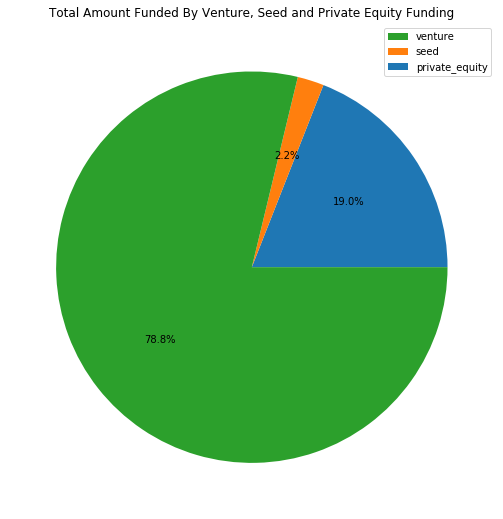

In [39]:
funding_distribution_pie = plotting_master.loc[(plotting_master.funding_round_type == 'venture') | (plotting_master.funding_round_type == 'seed') | (plotting_master.funding_round_type == 'private_equity')].groupby(['funding_round_type']).sum().plot(y='raised_amount_usd', kind='pie', legend='reverse', labels=None, figsize=(9, 9),autopct='%1.1f%%', title='Total Amount Funded By Venture, Seed and Private Equity Funding')
funding_distribution_pie.set(ylabel='')
plt.show()

### It is very clear that more than half of the fundings happening globally are VENTURE FUNDINGS.

### Now Let's find the average funding amount for each funding type

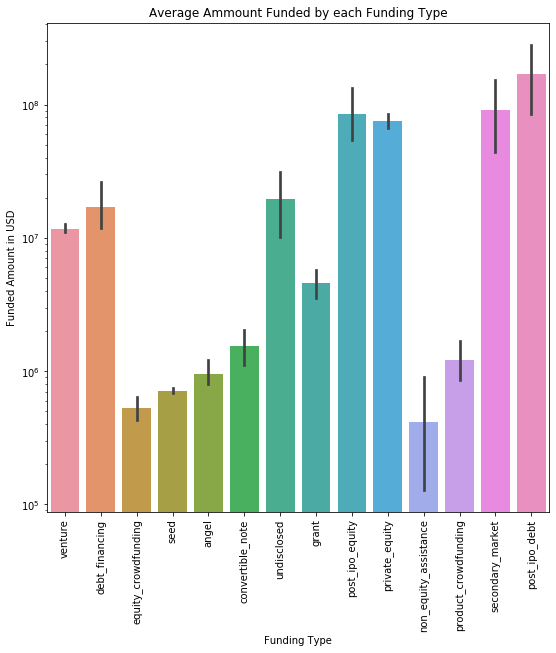

In [40]:
plt.figure(figsize=(9, 9))
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Average Ammount Funded by each Funding Type')
funding_avg_bar = sns.barplot(x='funding_round_type', y='raised_amount_usd', data=plotting_master)
funding_avg_bar.set(xlabel='Funding Type', ylabel='Funded Amount in USD')
plt.show()

### Since Spark Funds wants to Invest Between 5 million to 15 million USD

5 million = $0.5 x 10^{7}$
15 million = $1.5 x 10^{7}$

### Venture funding seems the apt choice as per the most representing values plotted above.

**NOTE : The variance in the Venture Funding is also less**

### Now Let's Plot and See the total amount of investment happening in the top 9 countries we found earlier.

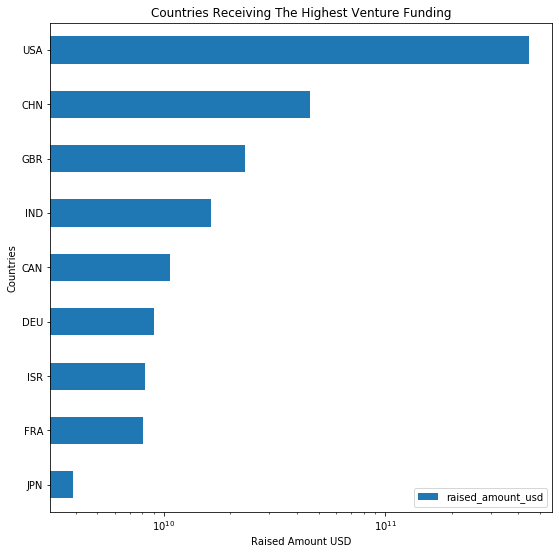

In [41]:
top9_funding_barh = top9.groupby(['country_code']).sum().sort_values(by='raised_amount_usd').plot(kind='barh', logx=True, figsize=(9,9), title='Countries Receiving The Highest Venture Funding')
top9_funding_barh.set(ylabel='Countries', xlabel='Raised Amount USD')
plt.show()

The top 9 countries receiving the highest venture funds are

1. USA
2. CHN
3. GBR
4. IND
5. CAN
6. DEU
7. ISR
8. FRA
9. JPN

It is notable that **USA**, **CHN** and **GBR** and the top 3 countries receiving **highest total venture investments** globally.
But Since We, **Spark Funds**, are only considering to invest in **English Speaking Countries**, the Top 3 countries for us would be 

1. **USA**
2. **GBR**
3. **CAN**

We've already found out the **top 3 sectors** in these countries. They are :-
1. **USA**
  1. Others
  2. Cleantech / Semiconductors
  3. Social, Finance, Analytics, Advertising
2. **GBR**
  1. Others
  2. Cleantech / Semiconductors
  3. Social, Finance, Analytics, Advertising
3. **CAN**
  1. Cleantech / Semiconductors
  2. Others
  3. Social, Finance, Analytics, Advertising
 

Now let's plot the **number of investments happened in countries USA, GBR & CAN in their top 3 sectors**

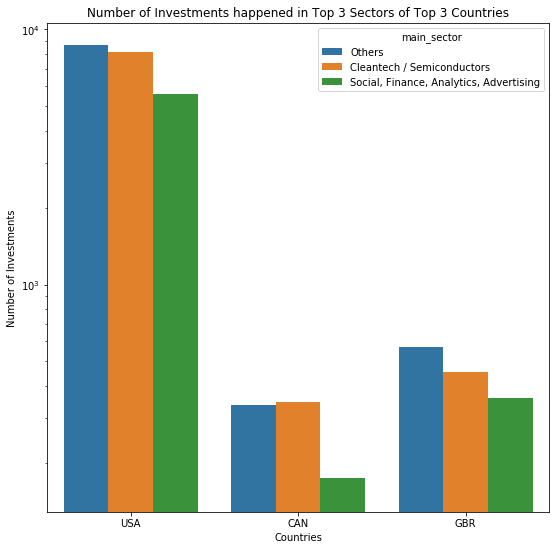

In [43]:
temp = master.loc[(master.country_code == 'USA') | (master.country_code == 'GBR') | (master.country_code == 'CAN')]
temp = temp.loc[(temp.main_sector == 'Others') | (temp.main_sector == 'Cleantech / Semiconductors') | (temp.main_sector == 'Social, Finance, Analytics, Advertising')]
plt.figure(figsize=(9, 9))
plt.yscale('log')
plt.title('Number of Investments happened in Top 3 Sectors of Top 3 Countries')
sector_wise_investmetn_top3_bar = sns.barplot(x='country_code', y='raised_amount_usd', hue='main_sector', data=temp, estimator=lambda x: len(x))
sector_wise_investmetn_top3_bar.set(xlabel='Countries', ylabel='Number of Investments')
plt.show()

## Conclusion

Since the main stategy is to **Invest in sectors where most investments are occurring**, The Spark Funds should follow the data and should prefer investing in countries
1. **USA**
2. **GBR**
3. **CAN**

and in sectors 
1. **Others**
2. **Cleantech / Semiconductors**
3. **Social, Finance, Analytics, Advertising**

listed in preferred order.